#libraries and functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
import pickle

In [92]:
#[helper functions]
def FeatureScalling(X):
  for column in X.columns:
    X[column] = (X[column] - X[column].min()) /(X[column].max() - X[column].min())
  return X

def PolynomialRegressionModel(X_train,y_train,X_test,y_test,Degree):
    model = make_pipeline(PolynomialFeatures(Degree), LinearRegression())
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('Mean Square Error:', metrics.mean_squared_error(y_test, prediction))
    print('r2_score :', metrics.r2_score(y_test, prediction))
    return model
def LinearRegressionModel(X_train,y_train,X_test,y_test):
    model =LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('Mean Square Error:', metrics.mean_squared_error(y_test, prediction))
    print('r2_score :', metrics.r2_score(y_test, prediction)) 
    return model
def SVM_MODEL(x_train,y_train,kERNEL):
  detection=SVC(kernel=KERNEL)
  detection.fit(X_train,Y_train)
  train_preds=detection.predict(X_train)
  train_error=accuracy_score(Y_train,train_preds)
  print("train accuracy: ",train_error)
  test_preds=detection.predict(X_test)
  test_error=accuracy_score(Y_test,test_preds)
  print("test accuracy: ",test_error)
def MULTI(X_train,y_train,X_test,y_test):
  svm_kernel_ovo = OneVsOneClassifier(SVC(kernel='linear', C=1)).fit(X_train, y_train)
  svm_kernel_ovr = OneVsRestClassifier(SVC(kernel='linear', C=1)).fit(X_train, y_train)
  svm_linear_ovo = OneVsOneClassifier(LinearSVC(C=1),).fit(X_train, y_train)
  svm_linear_ovr = OneVsRestClassifier(LinearSVC(C=1)).fit(X_train, y_train)
  # model accuracy for svc model
  accuracy = svm_kernel_ovr.score(X_test, y_test)
  print('Linear Kernel OneVsRest SVM accuracy: ' + str(accuracy))
  accuracy = svm_kernel_ovo.score(X_test, y_test)
  print('Linear Kernel OneVsOne SVM accuracy: ' + str(accuracy))
  # model accuracy for svc model
  accuracy = svm_linear_ovr.score(X_test, y_test)
  print('LinearSVC OneVsRest SVM accuracy: ' + str(accuracy))
  accuracy = svm_linear_ovo.score(X_test, y_test)
  print('LinearSVC OneVsOne SVM accuracy: ' + str(accuracy))


 

# **Load Data**


In [93]:
taxi_data=pd.read_csv('taxi-rides.csv')
#taxi_data=pd.read_csv('taxi-rides.csv')
taxi_data.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [94]:
#from google.colab import drive
#drive.mount('/content/drive')

#**Data Visualization**

<AxesSubplot:xlabel='cab_type', ylabel='count'>

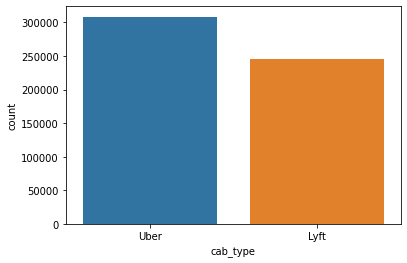

In [95]:
sns.countplot(x='cab_type', data=taxi_data)


<AxesSubplot:xlabel='distance', ylabel='price'>

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


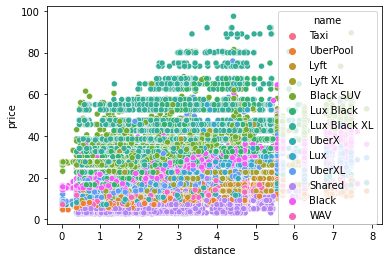

In [96]:
sns.scatterplot(data=taxi_data, x="distance", y="price",hue='name')

<AxesSubplot:xlabel='distance', ylabel='price'>

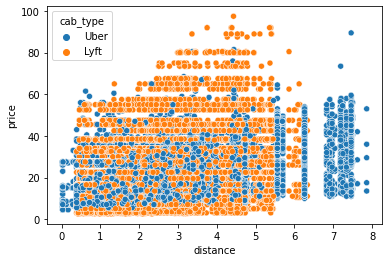

In [97]:
sns.scatterplot(data=taxi_data, x="distance", y="price",hue='cab_type')

# **Data cleaning**

In [98]:
taxi_data.count()

distance            554456
cab_type            554456
time_stamp          554456
destination         554456
source              554456
surge_multiplier    554456
id                  554456
product_id          554456
name                554456
price               510321
dtype: int64

In [99]:
taxi_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
price               44135
dtype: int64

In [100]:
taxi_data.dropna(subset=['price'],inplace=True)
taxi_data.reset_index(drop=True, inplace=True)

In [101]:
taxi_data.head(-5)

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
1,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
2,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
3,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0
4,1.97,Uber,1.543460e+12,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5
...,...,...,...,...,...,...,...,...,...,...
510311,1.80,Uber,1.543690e+12,Northeastern University,Theatre District,1.0,b5a3f541-2de8-4708-88e0-09bb9b5c19a6,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,10.5
510312,2.43,Lyft,1.544860e+12,South Station,Beacon Hill,1.0,16c556d2-2d40-4a8b-8b04-b1f9899cb1a3,lyft_premier,Lux,16.5
510313,1.03,Uber,1.544950e+12,North Station,North End,1.0,fd9167b4-e730-442c-a2b8-91663452025a,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.0
510314,0.76,Lyft,1.544840e+12,Haymarket Square,North Station,1.0,400cfbe1-de0d-4590-b853-bb24ee23065d,lyft_line,Shared,5.0


In [102]:
taxi_data.count()

distance            510321
cab_type            510321
time_stamp          510321
destination         510321
source              510321
surge_multiplier    510321
id                  510321
product_id          510321
name                510321
price               510321
dtype: int64

In [103]:
taxi_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
price               0
dtype: int64

In [104]:
taxi_data.duplicated().sum()

0

In [105]:
taxi_data =taxi_data.drop_duplicates()

In [106]:
weather_data=pd.read_csv('weather.csv')
#weather_data=pd.read_csv('weather.csv')
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [107]:
weather_data.count()

temp          6276
location      6276
clouds        6276
pressure      6276
rain           894
time_stamp    6276
humidity      6276
wind          6276
dtype: int64

In [108]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [109]:
#weather_data.fillna(0,inplace=True)
weather_data.drop(['rain'],axis=1,inplace=True)
weather_data.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49


In [110]:
weather_data.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
time_stamp    0
humidity      0
wind          0
dtype: int64

In [111]:
weather_data.duplicated().sum()

0

#**Feature Engineering**

In [112]:
#convert time stamp to date in taxi and weather and add it to key column
taxi_data['key'] = pd.to_datetime(taxi_data['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y/%m/%d')))
weather_data['key']=pd.to_datetime(weather_data['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y/%m/%d')))
weather_data.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind,key
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25,2018/12/16
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32,2018/12/16
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07,2018/12/16
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09,2018/12/16
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49,2018/12/16


In [113]:
taxi_data['trip_hour'] = pd.to_datetime(taxi_data['time_stamp'], unit='ms').dt.hour
taxi_data.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,key,trip_hour
0,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018/11/28,10
1,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018/12/16,0
2,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018/11/30,23
3,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018/11/30,12
4,1.97,Uber,1.543460e+12,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,2018/11/29,2


In [114]:
#groub by  date  w  location then take average for other columns
weather=weather_data.groupby(['key','location']).agg({'temp':'mean','clouds':'mean','pressure':'mean','humidity':'mean','wind':'mean'}).reset_index()

In [115]:
Data=taxi_data.merge(weather,how='left',left_on=['source','key'], right_on=['location','key'])
Data=Data.merge(weather,how='left',left_on=['destination','key'], right_on=['location','key'])

In [116]:
#Data_source.drop(['location','key'],axis=1,inplace=True)
Data.drop(['key','location_x','location_y','destination','source'],axis=1,inplace=True)

In [117]:
Data['trip_hour'] = pd.to_datetime(Data['time_stamp'], unit='ms').dt.hour

In [118]:
weather.duplicated().sum()

0

#**Feature selection**

In [119]:
Data.corr()

,distance,time_stamp,surge_multiplier,price,trip_hour,temp_x,clouds_x,pressure_x,humidity_x,wind_x,temp_y,clouds_y,pressure_y,humidity_y,wind_y
distance,1.000000,0.002796,0.025681,0.345093,0.002965,-0.005317,-0.000075,0.003550,-0.003549,-0.005823,-0.006798,-0.000210,0.003580,-0.001314,-0.006079
time_stamp,0.002796,1.000000,0.000867,0.000878,0.009779,-0.308485,-0.019099,0.557175,-0.265873,0.028086,-0.308444,-0.019133,0.557181,-0.265880,0.028058
surge_multiplier,0.025681,0.000867,1.000000,0.239984,-0.000012,-0.000405,0.000162,-0.002755,-0.000342,0.002577,0.000190,-0.000173,-0.002779,-0.001262,0.003704
price,0.345093,0.000878,0.239984,1.000000,0.001099,-0.002139,-0.000189,0.000604,-0.002776,-0.000474,-0.002607,-0.000257,0.000613,-0.002127,-0.000522
trip_hour,0.002965,0.009779,-0.000012,0.001099,1.000000,-0.013566,0.065387,0.000303,0.098583,-0.098929,-0.013668,0.065302,0.000307,0.098721,-0.098911
temp_x,-0.005317,-0.308485,-0.000405,-0.002139,-0.013566,1.000000,0.640631,-0.394686,0.737979,0.102099,0.998990,0.640734,-0.394685,0.739528,0.101756
clouds_x,-0.000075,-0.019099,0.000162,-0.000189,0.065387,0.640631,1.000000,-0.259721,0.829623,0.210383,0.640670,0.999835,-0.259723,0.829471,0.210359
pressure_x,0.003550,0.557175,-0.002755,0.000604,0.000303,-0.394686,-0.259721,1.000000,-0.232145,-0.689942,-0.394705,-0.259724,0.999999,-0.232061,-0.689903
humidity_x,-0.003549,-0.265873,-0.000342,-0.002776,0.098583,0.737979,0.829623,-0.232145,1.000000,-0.102051,0.739493,0.829515,-0.232161,0.997261,-0.101774
wind_x,-0.005823,0.028086,0.002577,-0.000474,-0.098929,0.102099,0.210383,-0.689942,-0.102051,1.000000,0.101869,0.210449,-0.689931,-0.101796,0.999351


In [120]:
Data=Data.drop(['id','product_id','time_stamp','clouds_x','clouds_y','wind_x','wind_y'],axis=1,inplace=False)
Data.head()

,distance,cab_type,surge_multiplier,name,price,trip_hour,temp_x,pressure_x,humidity_x,temp_y,pressure_y,humidity_y
0,2.27,Uber,1.0,UberPool,8.0,10,37.098861,992.196709,0.731392,37.127848,992.227722,0.729873
1,2.00,Lyft,1.0,Lyft,10.5,0,41.034167,1020.190833,0.735417,41.039583,1020.168333,0.734583
2,3.98,Lyft,1.0,Lyft XL,22.5,23,35.585600,1015.532800,0.714000,35.612800,1015.528400,0.714000
3,1.49,Lyft,1.0,Lyft,7.0,12,35.585600,1015.532800,0.714000,35.646800,1015.540400,0.711600
4,1.97,Uber,1.0,Black SUV,29.5,2,38.877031,1000.915000,0.672812,38.730938,1000.940000,0.676094


# **Label encoding**

In [121]:
Data['cab_type']=Data.cab_type.map(dict(Uber=0,Lyft=1))

In [122]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(Data[['name']]).toarray())
Data = Data.join(encoder_df)
Data=Data.rename(columns={0: "name0", 1: "name1", 2: "name2" , 3 :'name3' , 4: "name4", 5: "name5", 6: "name6" , 7 :'name7' ,8: "name8", 9: "name9", 10: "name10" , 11 :'name11',12:'name12'})
Data.drop('name',axis=1,inplace=True)

In [123]:
with open('encoder', 'wb') as files:
    pickle.dump(encoder, files)

In [124]:
Data.head()

,distance,cab_type,surge_multiplier,price,trip_hour,temp_x,pressure_x,humidity_x,temp_y,pressure_y,...,name2,name3,name4,name5,name6,name7,name8,name9,name10,name11
0,2.27,0,1.0,8.0,10,37.098861,992.196709,0.731392,37.127848,992.227722,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.00,1,1.0,10.5,0,41.034167,1020.190833,0.735417,41.039583,1020.168333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.98,1,1.0,22.5,23,35.585600,1015.532800,0.714000,35.612800,1015.528400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.49,1,1.0,7.0,12,35.585600,1015.532800,0.714000,35.646800,1015.540400,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.97,0,1.0,29.5,2,38.877031,1000.915000,0.672812,38.730938,1000.940000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
X=Data.drop(['price'],axis=1,inplace=False)
#X=FeatureScalling(X)
min_max=MinMaxScaler()
X=min_max.fit_transform(X)

pca=PCA(n_components=16)
X=pca.fit_transform(X)

y=Data['price']#label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [126]:
with open('min_max', 'wb') as files:
    pickle.dump(min_max, files)

with open('pca', 'wb') as files:
    pickle.dump(pca, files)    

# **Models**

In [139]:
X=Data.drop(['price'],axis=1,inplace=False)
X=min_max.transform(X)
y=Data['price']#label
X=pca.transform(X)
model_1=PolynomialRegressionModel(X_train,y_train,X_test,y_test,3)
preds=model_1.predict(X)

Mean Square Error: 3.343986457411804
r2_score : 0.9614445978937223


In [140]:
with open('pipeline2', 'wb') as files:
    pickle.dump(model_1, files)

In [128]:
with open('pipeline', 'wb') as files:
    pickle.dump(model_1, files)

In [129]:
model_2=LinearRegressionModel(X_train,y_train,X_test,y_test)

Mean Square Error: 9.144962624225313
r2_score : 0.8945606641311625


In [130]:

with open('model_2', 'wb') as files:
    pickle.dump(model_2, files)  

In [131]:
model_1_poly_features = PolynomialFeatures(degree=2)
# transforms the existing features to higher degree features.
X_train_poly_model_1 = model_1_poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model1 = linear_model.LinearRegression()
scores = cross_val_score(poly_model1, X_train_poly_model_1, y_train, scoring='neg_mean_squared_error', cv=7)
model_1_score = abs(scores.mean())
poly_model1.fit(X_train_poly_model_1, y_train)
print("model 1 cross validation score is "+ str(model_1_score))

model 1 cross validation score is 3.7629428126912496


In [132]:
taxi_data.head(1)

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,key,trip_hour
0,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018/11/28,10


In [3]:
#test senario
with open('pca' , 'rb') as f:
    pca= pickle.load(f)

with open('pipeline2' , 'rb') as f:
    model_2= pickle.load(f)

with open('min_max' , 'rb') as f:
    min_max= pickle.load(f)

with open('encoder' , 'rb') as f:
    encoder= pickle.load(f)
train_data=pd.read_csv(("taxi-rides.csv"))

test_data=pd.read_csv("taxi-tas-regression-test.csv")
weather_data=pd.read_csv('weather.csv')
#TestCsv(test_data=test_data,train_data=train_data,model=model_2,weather_data=weather_data,encoder=encoder,min_max=min_max,pca=pca)
TestCsv(test_data=test_data,train_data=train_data,model=model_2,weather_data=weather_data,encoder=encoder,min_max=min_max,pca=pca)

Mean Square Error: 3.4956103612364515
r2_score : 0.9597720477907636


In [2]:
def TestCsv(test_data,train_data,model,weather_data,encoder,min_max,pca):


  #fill null values

  test_data['distance'].fillna(train_data['distance'].mean())
  test_data['cab_type'].fillna(train_data['cab_type'].mode())
  test_data['time_stamp'].fillna(train_data['time_stamp'].mode())
  test_data['destination'].fillna(train_data['destination'].mode())
  test_data['source'].fillna(train_data['source'].mode())
  test_data['surge_multiplier'].fillna(train_data['surge_multiplier'].mean())
  
  test_data['name'].fillna(train_data['name'].mode())
  test_data['price'].fillna(train_data['price'].mean())

  #merge taxi data and weather
  test_data['key'] = pd.to_datetime(test_data['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y/%m/%d')))
  weather_data['key']=pd.to_datetime(weather_data['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y/%m/%d')))
  test_data['trip_hour'] = pd.to_datetime(test_data['time_stamp'], unit='ms').dt.hour
  weather=weather_data.groupby(['key','location']).agg({'temp':'mean','clouds':'mean','pressure':'mean','humidity':'mean','wind':'mean'}).reset_index()
  test=test_data.merge(weather,how='left',left_on=['source','key'], right_on=['location','key'])
  test=test.merge(weather,how='left',left_on=['destination','key'], right_on=['location','key'])
  test.drop(['key','location_x','location_y','destination','source'],axis=1,inplace=True)
  
  #drop non helpfull features
  test=test.drop(['id','product_id','time_stamp','clouds_x','clouds_y','wind_x','wind_y'],axis=1,inplace=False)
  
  #map cab type  to 0 when uber and 1 if Lyft
  test['cab_type']=test.cab_type.map(dict(Uber=0,Lyft=1)) 

  #label encoding for name category
  encoder_name = pd.DataFrame(encoder.transform(test[['name']]).toarray())
  test = test.join(encoder_name)
  test=test.rename(columns={0: "name0", 1: "name1", 2: "name2" , 3 :'name3' , 4: "name4", 5: "name5", 6: "name6" , 7 :'name7' ,8: "name8", 9: "name9", 10: "name10" , 11 :'name11',12:'name12'})
  test.drop('name',axis=1,inplace=True)

  #scaling data

  X=test.drop(['price'],axis=1,inplace=False)
  X=min_max.transform(X)
  y=test['price']#label
  X=pca.transform(X)
  preds=model.predict(X)
  print('Mean Square Error:', metrics.mean_squared_error(y, preds))
  print('r2_score :', metrics.r2_score(y, preds)) 


  
  
